##Question 6:

In [18]:
## 6(a):
import numpy as np
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10                      # X values between 0 and 10
y_true = 3 * X.squeeze() + 7                         # True linear relation
noise = np.random.normal(0, 3, size=X.shape[0])      # Gaussian noise
y = y_true + noise                                   # Add noise to output

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
## 6(b):
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Compute MSE
mse_linear = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse_linear:.3f}")

Linear Regression MSE: 5.883


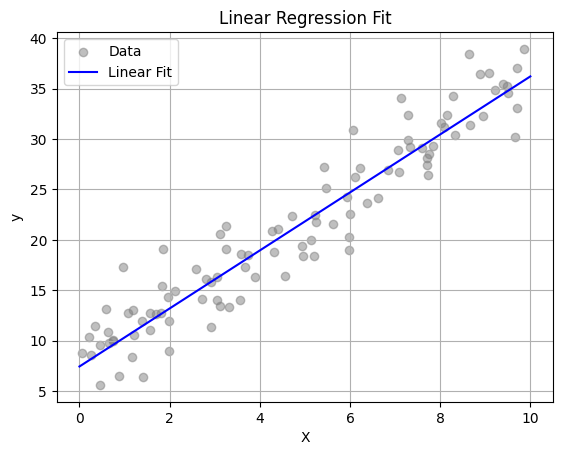

In [20]:
## 6(c):
import matplotlib.pyplot as plt

# Plot
plt.scatter(X, y, color='gray', label='Data', alpha=0.5)
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot = linear_model.predict(X_plot)

plt.plot(X_plot, y_plot, color='blue', label='Linear Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

Degree 2 Polynomial MSE: 5.723


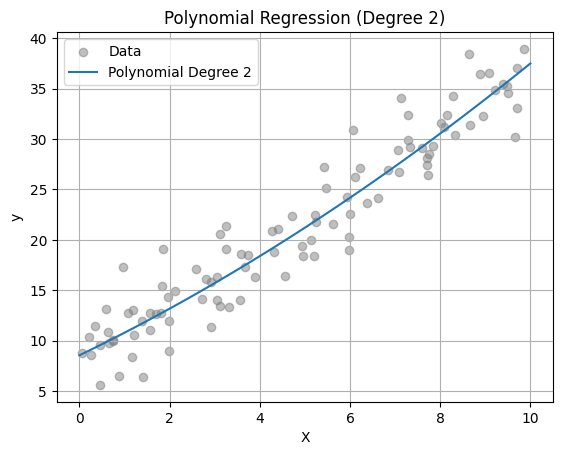

Degree 3 Polynomial MSE: 5.778


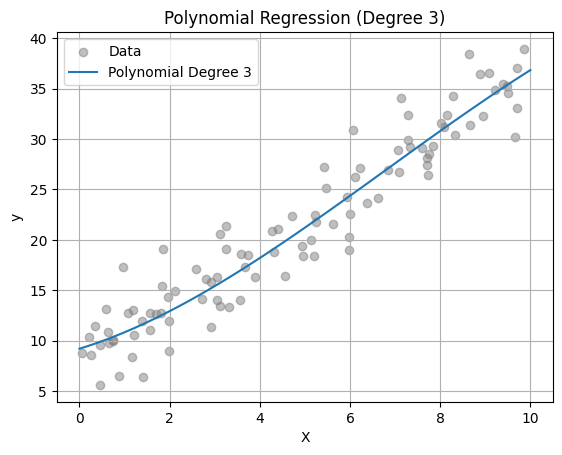

In [21]:
## 6(d):
from sklearn.preprocessing import PolynomialFeatures

for degree in [2, 3]:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred_poly = model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    print(f"Degree {degree} Polynomial MSE: {mse_poly:.3f}")

    # Plot
    X_plot_poly = poly.transform(X_plot)
    y_plot_poly = model.predict(X_plot_poly)

    plt.scatter(X, y, color='gray', label='Data', alpha=0.5)
    plt.plot(X_plot, y_plot_poly, label=f'Polynomial Degree {degree}')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()
    plt.grid(True)
    plt.show()


##Question 7:

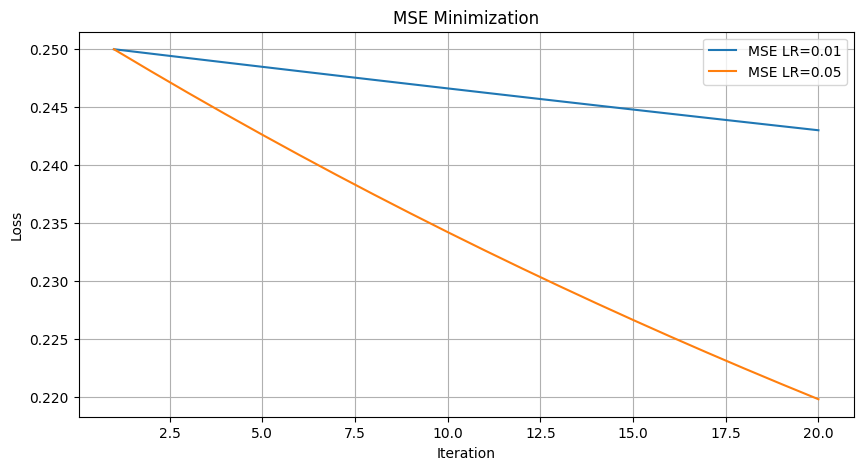

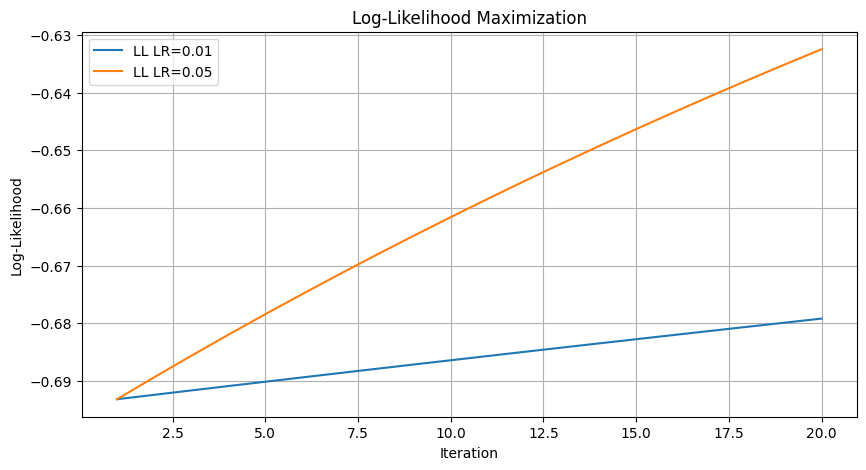

Final weights (MSE Minimization):
  Learning Rate 0.01: [-0.046877  0.021083 -0.017235]
  Learning Rate 0.05: [-0.213588  0.101994 -0.085626]

Final weights (Log-Likelihood Maximization):
  Learning Rate 0.01: [-0.046877  0.021083 -0.017235]
  Learning Rate 0.05: [-0.213588  0.101994 -0.085626]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("A2_P2.csv")
X = df[['Feature 1', 'Feature 2']].values
y = df['Output'].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def log_likelihood(y_true, y_pred):
    eps = 1e-15
    return np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def gradient_descent_mse(X, y, lr=0.01, num_iter=20):
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []
    for _ in range(num_iter):
        y_pred = sigmoid(X @ w)
        gradient = (X.T @ (y_pred - y)) / m
        w -= lr * gradient
        loss_history.append(mse_loss(y, y_pred))
    return w, loss_history

def gradient_ascent_ll(X, y, lr=0.01, num_iter=20):
    m, n = X.shape
    w = np.zeros(n)
    ll_history = []
    for _ in range(num_iter):
        y_pred = sigmoid(X @ w)
        gradient = (X.T @ (y - y_pred)) / m
        w += lr * gradient
        ll_history.append(log_likelihood(y, y_pred))
    return w, ll_history

learning_rates = [0.01, 0.05]
num_iter = 20
final_weights_mse = {}
final_weights_ll = {}

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    w, losses = gradient_descent_mse(X, y, lr, num_iter)
    final_weights_mse[lr] = w
    plt.plot(range(1, num_iter + 1), losses, label=f"MSE LR={lr}")
plt.title("MSE Minimization")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    w, losses = gradient_ascent_ll(X, y, lr, num_iter)
    final_weights_ll[lr] = w
    plt.plot(range(1, num_iter + 1), losses, label=f"LL LR={lr}")
plt.title("Log-Likelihood Maximization")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.grid(True)
plt.show()

print("Final weights (MSE Minimization):")
for lr, w in final_weights_mse.items():
    print(f"  Learning Rate {lr}: {np.round(w, 6)}")

print("\nFinal weights (Log-Likelihood Maximization):")
for lr, w in final_weights_ll.items():
    print(f"  Learning Rate {lr}: {np.round(w, 6)}")

##Question 8:

Linear MSE: 4.7221
Linear Coefficients: [ 4.92134147 -3.0484459   2.02673864  0.12047436 -0.24075384  0.03088526
 -0.53255243  1.15453873 -1.93539027  3.9989681 ]

LASSO (λ=1) MSE: 8.9148
LASSO (λ=1) Coefficients: [ 3.62100038 -2.07351053  1.10310231 -0.         -0.          0.
 -0.          0.         -0.47326741  3.33487857]

Ridge (λ=0.1) MSE: 4.7029
Ridge (λ=0.1) Coefficients: [ 4.91293481 -3.04515459  2.02495975  0.11985873 -0.24032056  0.03227175
 -0.53008679  1.15302583 -1.93098002  3.99499019]



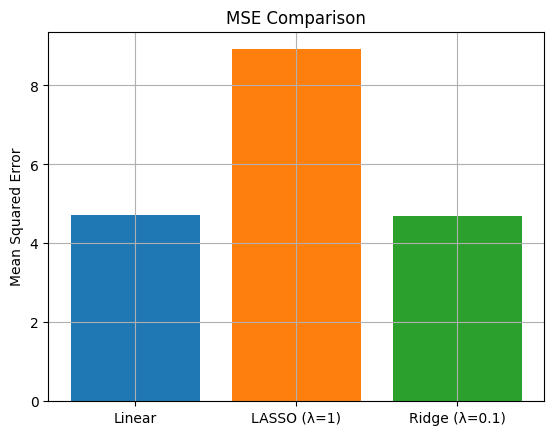

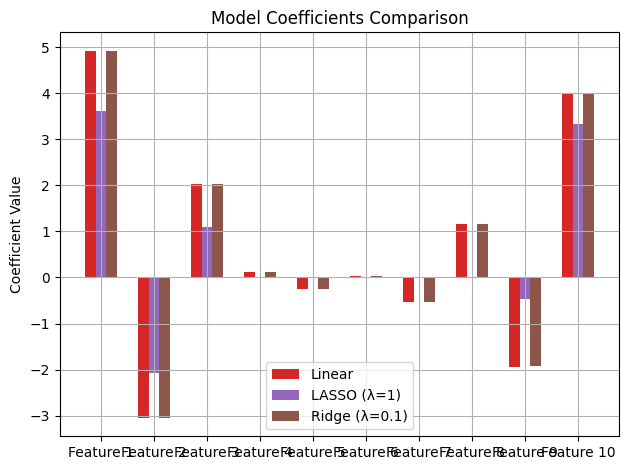

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("A2_P3.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear": LinearRegression(),
    "LASSO (λ=1)": Lasso(alpha=1),
    "Ridge (λ=0.1)": Ridge(alpha=0.1)
}

mse_scores = {}
coeffs = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, preds)
    coeffs[name] = model.coef_
    print(f"{name} MSE: {mse_scores[name]:.4f}")
    print(f"{name} Coefficients: {model.coef_}\n")

# Plot MSE with different colors
plt.bar(mse_scores.keys(), mse_scores.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # blue, orange, green
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# Plot Coefficients with new colors
labels = [f"Feature {i+1}" for i in range(X.shape[1])]
x = np.arange(len(labels))
width = 0.2
colors = ['#d62728', '#9467bd', '#8c564b']  # red, purple, brown

for idx, (name, coef) in enumerate(coeffs.items()):
    plt.bar(x + idx * width, coef, width=width, label=name, color=colors[idx])

plt.xticks(x + width, labels)
plt.ylabel("Coefficient Value")
plt.title("Model Coefficients Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()